# Building an Ibor Single Curve

Constructing an Ibor Single Curve

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from financepy.utils import *
from financepy.products.rates import *

####################################################################
# FINANCEPY BETA Version 0.185 - This build:  24 Oct 2020 at 20:12 #
#      This software is distributed FREE & WITHOUT ANY WARRANTY    #
# For info and disclaimer - https://github.com/domokane/FinancePy  #
#      Send any bug reports or comments to quant@financepy.com     #
####################################################################



## Creating the Libor Instruments

In [3]:
valuation_date = Date(18, 9, 2019)

### Load up the deposits first

In [4]:
depoDCCType = DayCountTypes.THIRTY_E_360_ISDA
depos = []

spot_days = 2
settlement_date = valuation_date.addWeekDays(spot_days)

deposit_rate = 0.050
maturity_date = settlement_date.addMonths(1)
depo = FinIborDeposit(settlement_date, maturity_date, deposit_rate, depoDCCType)
depos.append(depo)

maturity_date = settlement_date.addMonths(3)
depo = FinIborDeposit(settlement_date, maturity_date, deposit_rate, depoDCCType)
depos.append(depo)

maturity_date = settlement_date.addMonths(6)
depo = FinIborDeposit(settlement_date, maturity_date, deposit_rate, depoDCCType)
depos.append(depo)

maturity_date = settlement_date.addMonths(9)
depo = FinIborDeposit(settlement_date, maturity_date, deposit_rate, depoDCCType)
depos.append(depo)

maturity_date = settlement_date.addMonths(12)
depo = FinIborDeposit(settlement_date, maturity_date, deposit_rate, depoDCCType)
depos.append(depo)

### Then we load up the FRAs

In [5]:
# 1 x 4 FRA
payFixed = True
notional = 1000
fras = []

fraRate = 0.05
fraSettlementDate = settlement_date.addMonths(12)
fraMaturityDate = settlement_date.addMonths(16)
fra = FinIborFRA(fraSettlementDate, fraMaturityDate, fraRate, depoDCCType)
fras.append(fra)

# 4 x 7 FRA
fraRate = 0.08
fraSettlementDate = settlement_date.addMonths(16)
fraMaturityDate = settlement_date.addMonths(20)
fra = FinIborFRA(fraSettlementDate, fraMaturityDate, fraRate, depoDCCType)
fras.append(fra)

### Then we load up swap rates

In [6]:
swaps = []
fixedDCCType = DayCountTypes.ACT_365F
fixedFreqType = FrequencyTypes.SEMI_ANNUAL
swapType = SwapTypes.PAY

swap_rate = 0.050
maturity_date = settlement_date.addMonths(24)
swap = FinIborSwap(settlement_date, maturity_date, swapType, swap_rate, fixedFreqType, fixedDCCType)
swaps.append(swap)

swap_rate = 0.052
maturity_date = settlement_date.addMonths(36)
swap = FinIborSwap(settlement_date, maturity_date, swapType, swap_rate, fixedFreqType, fixedDCCType)
swaps.append(swap)

swap_rate = 0.0535
maturity_date = settlement_date.addMonths(48)
swap = FinIborSwap(settlement_date, maturity_date, swapType, swap_rate, fixedFreqType, fixedDCCType)
swaps.append(swap)

swap_rate = 0.055
maturity_date = settlement_date.addMonths(60)
swap = FinIborSwap(settlement_date, maturity_date, swapType, swap_rate, fixedFreqType, fixedDCCType)
swaps.append(swap)

swap_rate = 0.0565
maturity_date = settlement_date.addMonths(84)
swap = FinIborSwap(settlement_date, maturity_date, swapType, swap_rate, fixedFreqType, fixedDCCType)
swaps.append(swap)

swap_rate = 0.057
maturity_date = settlement_date.addMonths(120)
swap = FinIborSwap(settlement_date, maturity_date, swapType, swap_rate, fixedFreqType, fixedDCCType)
swaps.append(swap)

In [7]:
libor_curve = FinIborSingleCurve(valuation_date, depos, fras, swaps)

Inserting synthetic deposit


## Check Repricing

In [8]:
for depo in depos:
    v = depo.value(settlement_date, libor_curve)
    print("Depo Value: %10.6f"% v)

Depo Value: 100.000000
Depo Value: 100.000000
Depo Value: 100.000000
Depo Value: 100.000000
Depo Value: 100.000000
Depo Value: 100.000000


In [9]:
for fra in fras:
    v = fra.value(settlement_date, libor_curve)
    print("FRA Value: %10.6f"% v)

FRA Value:   0.000000
FRA Value:  -0.000000


In [10]:
for swap in swaps:
    v = swap.value(settlement_date, libor_curve)
    print("Swap Value: %12.8f" % v)

Swap Value:   0.00000000
Swap Value:   0.00000000
Swap Value:  -0.00000000
Swap Value:  -0.00000000
Swap Value:  -0.00000000
Swap Value:   0.00000000


## Curve Examination

Generate a vector of time points and then generate zero rates and forward rates

In [11]:
years = np.linspace(0.01,10,500)
dates = settlement_date.addYears(years)
zero_rates = libor_curve.zero_rate(dates)
fwd_rates = libor_curve.fwd(dates)

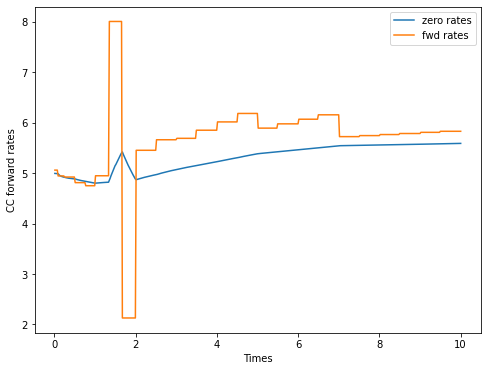

In [12]:
plt.figure(figsize=(8,6))
plt.plot(years, zero_rates*100, label="zero rates")
plt.plot(years, fwd_rates*100, label = "fwd rates")
plt.xlabel("Times")
plt.ylabel("CC forward rates")
plt.legend();

We see that the forward rates are piecewise flat